In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras.applications import InceptionV3, ResNet50
from keras import Model
from keras.metrics import Precision, Recall
import warnings
warnings.filterwarnings("ignore")

2024-02-19 13:34:01.169842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 13:34:01.169940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 13:34:01.331959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=355,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True,
    # width_shift_range=0.1
)

In [7]:
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory(
  '/kaggle/input/new-plant-disease-dataset-own/New Plant Disease Dataset (OWN)/train',
  target_size=(200, 200),
  class_mode='categorical', 
  batch_size=100,
)

Found 70289 images belonging to 38 classes.


In [8]:
test_dataset = test_datagen.flow_from_directory(
  '/kaggle/input/new-plant-disease-dataset-own/New Plant Disease Dataset (OWN)/test',
  target_size=(200, 200),
  class_mode='categorical',
  batch_size=100,
  shuffle=False
)

Found 19761 images belonging to 38 classes.


In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Define the validation data generator
valid_datagen = ImageDataGenerator()

# Define the path to the validation directory
valid_directory = '/kaggle/input/new-plant-disease-dataset-own/New Plant Disease Dataset (OWN)/valid'

# Generate the validation dataset
valid_dataset = valid_datagen.flow_from_directory(
    valid_directory,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=100
)


Found 17570 images belonging to 38 classes.


In [11]:
import keras
METRICS = [
    'accuracy',
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

In [12]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(10,10))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

In [13]:
labels = {
    'Apple___Apple_scab': 0,
    'Apple___Black_rot': 1,
    'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3,
    'Blueberry___healthy': 4,
    'Cherry_(including_sour)___Powdery_mildew': 5,
    'Cherry_(including_sour)___healthy': 6,
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
    'Corn_(maize)___Common_rust_': 8,
    'Corn_(maize)___Northern_Leaf_Blight': 9,
    'Corn_(maize)___healthy': 10,
    'Grape___Black_rot': 11,
    'Grape___Esca_(Black_Measles)': 12,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
    'Grape___healthy': 14,
    'Orange___Haunglongbing_(Citrus_greening)': 15,
    'Peach___Bacterial_spot': 16,
    'Peach___healthy': 17,
    'Pepper,_bell___Bacterial_spot': 18,
    'Pepper,_bell___healthy': 19,
    'Potato___Early_blight': 20,
    'Potato___Late_blight': 21,
    'Potato___healthy': 22,
    'Raspberry___healthy': 23,
    'Soybean___healthy': 24,
    'Squash___Powdery_mildew': 25,
    'Strawberry___healthy': 26,
    'Strawberry___Leaf_scorch': 27,
    'Tomato___Bacterial_spot': 28,
    'Tomato___Early_blight': 29,
    'Tomato___healthy': 30,
    'Tomato___Late_blight': 31,
    'Tomato___Leaf_Mold': 32,
    'Tomato___Septoria_leaf_spot': 33,
    'Tomato___Spider_mites Two-spotted_spider_mite': 34,
    'Tomato___Target_Spot': 35,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 36,
    'Tomato___Tomato_mosaic_virus': 37
}

print(labels)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___healthy': 26, 'Strawberry___Leaf_scorch': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___healthy': 30, 'Tomato___L

In [14]:
# Initialize an empty list to store the labels
labels = []

# Iterate through the class indices dictionary
for key, value in train_dataset.class_indices.items():
    # Append the keys (class indices) to the labels list
    labels.append(key)


In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(38, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 23, 64)       

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [21]:
Info = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=40,
  workers=2
)

Epoch 1/40


I0000 00:00:1708350015.720633     180 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


703/703 [==============================] - 672s 948ms/step - loss: 2.8982 - accuracy: 0.1894 - precision: 0.6479 - recall: 0.0489 - val_loss: 2.0186 - val_accuracy: 0.4272 - val_precision: 0.6726 - val_recall: 0.2456
Epoch 2/40
703/703 [==============================] - 456s 647ms/step - loss: 1.4149 - accuracy: 0.5602 - precision: 0.7429 - recall: 0.3978 - val_loss: 1.3735 - val_accuracy: 0.6600 - val_precision: 0.7568 - val_recall: 0.5620
Epoch 3/40
703/703 [==============================] - 449s 638ms/step - loss: 0.8065 - accuracy: 0.7426 - precision: 0.8226 - recall: 0.6666 - val_loss: 1.1187 - val_accuracy: 0.7595 - val_precision: 0.8279 - val_recall: 0.6943
Epoch 4/40
703/703 [==============================] - 450s 640ms/step - loss: 0.5516 - accuracy: 0.8210 - precision: 0.8670 - recall: 0.7814 - val_loss: 0.8666 - val_accuracy: 0.8172 - val_precision: 0.8542 - val_recall: 0.7868
Epoch 5/40
703/703 [==============================] - 452s 641ms/step - loss: 0.4279 - accuracy: 0.

In [24]:
model.save("Resnet50-VGG.h5")

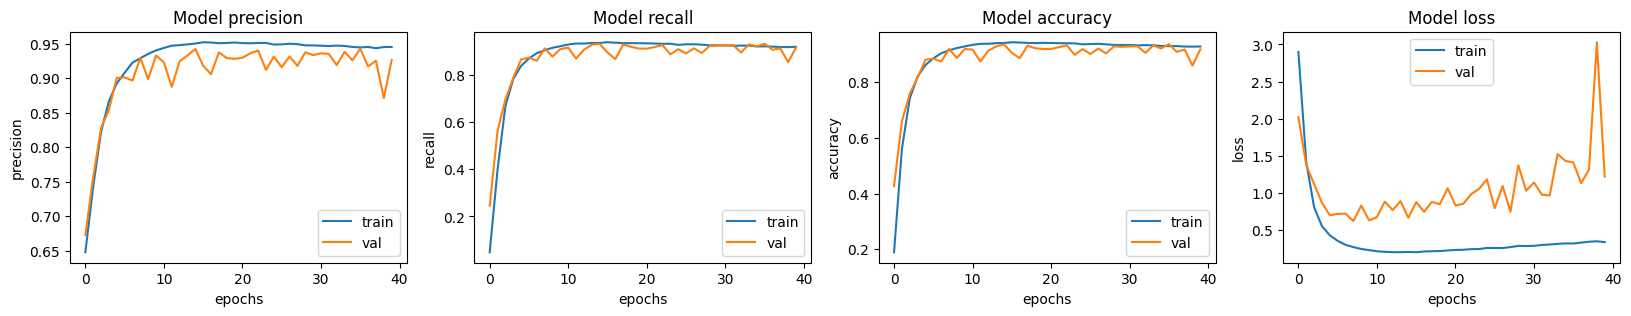

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [25]:
model.save("Resnet50-VGG.pkl")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (38,) and arg 1 with shape (9,).

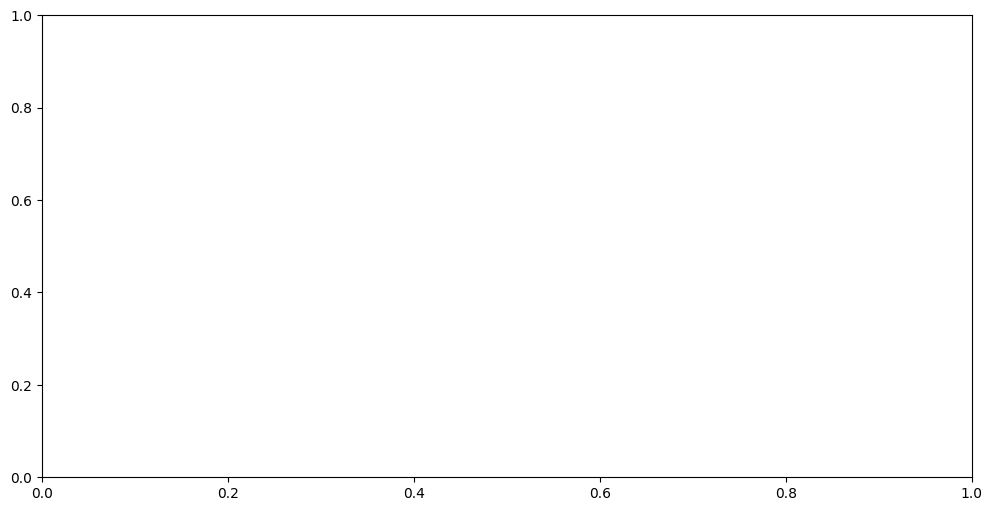

In [32]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Class names or labels
# class_names = [
#     'Apple___Apple_scab',
#     'Apple___Black_rot',
#     'Apple___Cedar_apple_rust',
#     'Apple___healthy',
#     'Blueberry___healthy',
#     'Cherry_(including_sour)___Powdery_mildew',
#     'Cherry_(including_sour)___healthy',
#     'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
#     'Corn_(maize)___Common_rust_',
#     'Corn_(maize)___Northern_Leaf_Blight',
#     'Corn_(maize)___healthy',
#     'Grape___Black_rot',
#     'Grape___Esca_(Black_Measles)',
#     'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
#     'Grape___healthy',
#     'Orange___Haunglongbing_(Citrus_greening)',
#     'Peach___Bacterial_spot',
#     'Peach___healthy',
#     'Pepper,_bell___Bacterial_spot',
#     'Pepper,_bell___healthy',
#     'Potato___Early_blight',
#     'Potato___Late_blight',
#     'Potato___healthy',
#     'Raspberry___healthy',
#     'Soybean___healthy',
#     'Squash___Powdery_mildew',
#     'Strawberry___healthy',
#     'Strawberry___Leaf_scorch',
#     'Tomato___Bacterial_spot',
#     'Tomato___Early_blight',
#     'Tomato___healthy',
#     'Tomato___Late_blight',
#     'Tomato___Leaf_Mold',
#     'Tomato___Septoria_leaf_spot',
#     'Tomato___Spider_mites Two-spotted_spider_mite',
#     'Tomato___Target_Spot',
#     'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
#     'Tomato___Tomato_mosaic_virus'
#       ]



# # Example precision, recall, and F1-score values for each class (should match the length of class_names)
# precision_values = np.random.rand(9)  # Replace this with your precision values
# recall_values = np.random.rand(9)  # Replace this with your recall values
# f1_score_values = np.random.rand(9)  # Replace this with your F1-score values

# # Plotting precision, recall, and F1-score
# fig, ax = plt.subplots(figsize=(12, 6))

# index = np.arange(len(class_names))
# bar_width = 0.2

# rects1 = ax.bar(index, precision_values, bar_width, label='Precision')
# rects2 = ax.bar(index + bar_width, recall_values, bar_width, label='Recall')
# rects3 = ax.bar(index + 2 * bar_width, f1_score_values, bar_width, label='F1 Score')

# ax.set_xlabel('Classes')
# ax.set_ylabel('Scores')
# # ax.set_title('Precision, Recall, and F1 aScore by Class')
# ax.set_xticks(index + bar_width)
# ax.set_xticklabels(class_names, rotation=90)
# ax.legend()

# plt.tight_layout()
# plt.show()




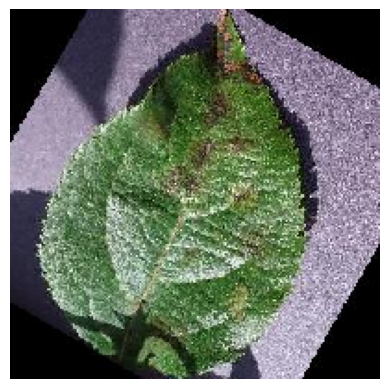

1/1 [==============================] - 0s 21ms/step
True label: Apple___Apple_scab
Predicted label: Apple___Apple_scab


In [29]:
def get_class_string_from_index(index):
   for class_string, class_index in test_dataset.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(test_dataset)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))